In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def getcontents(filepath):
    f = open(filepath, "r")
    bigarr = []
    for line in f:
        arr = np.array(line.replace("\n", "").split("\t"))
        # print(line)
        bigarr.append(arr)
    bigarr = np.array(bigarr)
    return bigarr

### For Graphs 9 and 10
---
Run ```bash helper_scripts/graph9.sh``` before running the following cells.

In [23]:
all_data = getcontents("../output/output9.out")
# print(all_data)
B = 4
N = 8
K = 0.6
prob_gen = np.array(all_data[:, 1]).astype(float)
algo_name = np.array(all_data[:, 2]).astype(str)

avg_PD = np.array(all_data[:, -3]).astype(float)
avg_LU = np.array(all_data[:, -1]).astype(float)


x_vals = []
for i in prob_gen:
    if i not in x_vals:
        x_vals.append(i)
dict_PD = {}
dict_LU = {}
for i in algo_name:
    if i not in dict_PD:
        dict_PD[i] = []
    if i not in dict_LU:
        dict_LU[i] = []

# want: dict PD = {algo1: [PD values over varying p], algo2: [], ...}
for i in range(len(prob_gen)):
    dict_PD[algo_name[i]].append(avg_PD[i])
    dict_LU[algo_name[i]].append(avg_LU[i])

# print(full_dict)
print(dict_LU)
print(dict_PD)


{'ISLIP': [0.0999875, 0.198288, 0.287225, 0.367163, 0.437412, 0.493013, 0.537675, 0.570175, 0.598875, 0.621625], 'KOUQ': [0.1011, 0.199538, 0.301563, 0.40005, 0.497175, 0.592237, 0.67405, 0.737525, 0.785713, 0.818875], 'INQ': [0.1011, 0.19955, 0.301563, 0.399425, 0.491262, 0.568187, 0.626888, 0.662963, 0.690125, 0.70155]}
{'ISLIP': [1.22753, 10.8178, 10.7391, 9.1913, 8.0631, 7.39692, 6.9901, 6.75049, 6.55122, 6.42228], 'KOUQ': [1.04947, 1.10677, 1.18647, 1.28974, 1.42304, 1.62322, 1.88677, 2.18265, 2.49238, 2.87923], 'INQ': [1.05514, 1.1348, 1.29567, 1.56835, 2.07287, 2.76946, 3.4565, 4.05683, 4.66224, 5.1636]}


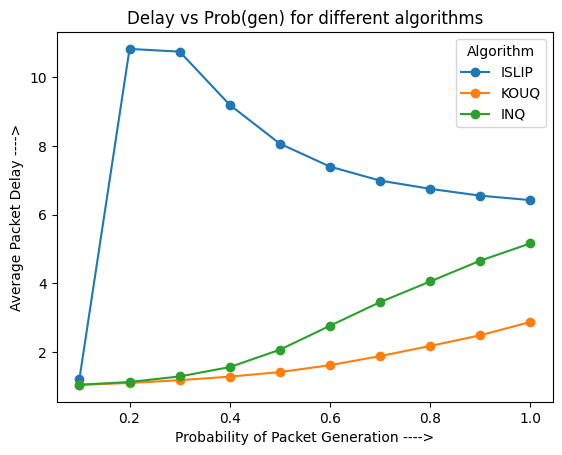

In [24]:
plt.figure()
plt.xlabel("Probability of Packet Generation ---->")
plt.ylabel("Average Packet Delay ---->")
for a in dict_PD:
    plt.plot(x_vals, dict_PD[a], marker='o', label=str(a))
plt.legend(title="Algorithm")
plt.title("Delay vs Prob(gen) for different algorithms")
plt.savefig("../images/img9.png")
plt.show()

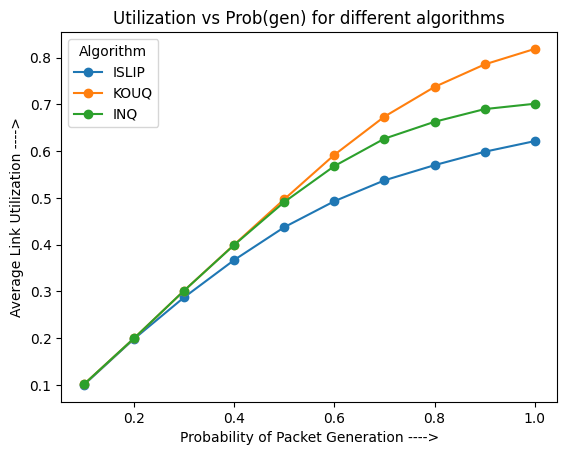

In [25]:
plt.figure()
plt.xlabel("Probability of Packet Generation ---->")
plt.ylabel("Average Link Utilization ---->")
for a in dict_LU:
    plt.plot(x_vals, dict_LU[a], marker='o', label=str(a))
plt.legend(title="Algorithm")
plt.title("Utilization vs Prob(gen) for different algorithms")
plt.savefig("../images/img10.png")
plt.show()